<a href="https://colab.research.google.com/github/seonae0223/Deep_Learning/blob/main/02_Filter_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import torch

# 이미지를 로컬에서 로드하는 함수 정의
def load_image(image_path):
    image = Image.open(image_path)
    # image = image.resize((224, 224))  # CIFAR-10 크기로 조정
    image = np.array(image).transpose(2, 0, 1)  # 채널 순서 변경
    image = torch.tensor(image, dtype=torch.float32) / 255.0  # 정규화
    image = image.unsqueeze(0)  # 배치 차원 추가
    return image

# 가로, 세로 탐지 필터 정의

In [ ]:
# 필터 정의
vertical_filter = torch.tensor([[[[1, 0, -1],
                              [1, 0, -1],
                              [1, 0, -1]],
                             [[1, 0, -1],
                              [1, 0, -1],
                              [1, 0, -1]],
                             [[1, 0, -1],
                              [1, 0, -1],
                              [1, 0, -1]]]], dtype=torch.float32)

horizontal_filter = torch.tensor([[[[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]],
                                   [[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]],
                                   [[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]]]], dtype=torch.float32)

In [ ]:
# conv2d 연산을 함수처럼 사용
import torch.nn.functional as F

image_path = "cha.jpg"
images = load_image(image_path)
images.shape

torch.Size([1, 3, 474, 704])

In [ ]:
vertical_output = F.conv2d(images, vertical_filter)
horizontal_output = F.conv2d(images, horizontal_filter)

(-0.5, 701.5, 471.5, -0.5)

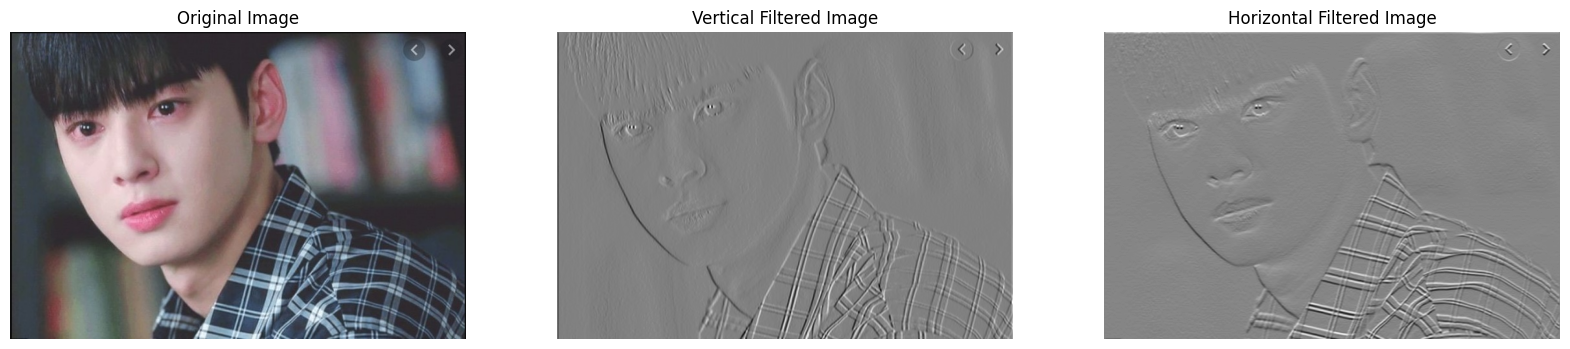

In [ ]:
import matplotlib.pyplot as plt

# 결과 시각화
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# 원본 이미지 시각화
ax[0].imshow(images[0].permute(1, 2, 0))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Vertical Filtered Image 시각화
ax[1].imshow(vertical_output[0].detach().numpy().transpose(1, 2, 0), cmap='gray')
ax[1].set_title('Vertical Filtered Image')
ax[1].axis('off')

# Horizontal Filtered Image 시각화
ax[2].imshow(horizontal_output[0].detach().numpy().transpose(1, 2, 0), cmap='gray')
ax[2].set_title('Horizontal Filtered Image')
ax[2].axis('off')

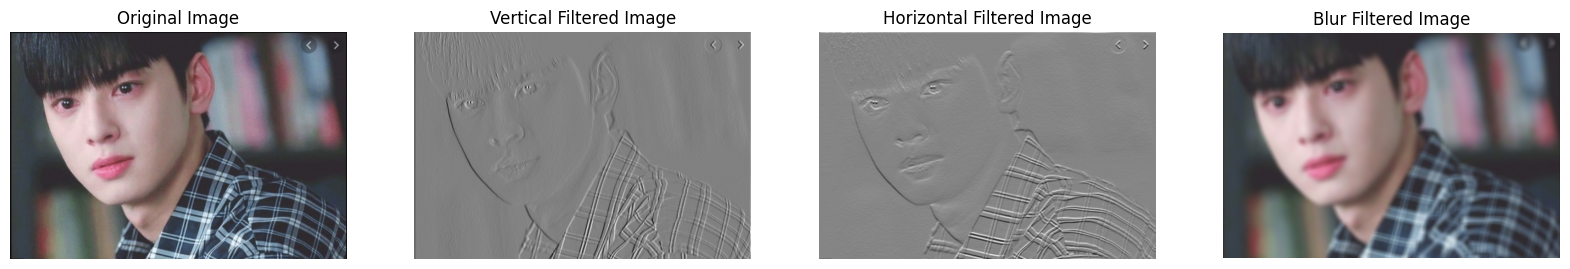

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Blur filter 만들기
blur_filter = torch.ones((1, 1, 11, 11), dtype=torch.float32) / 121.0

# 각 채널에 대해 블러 필터 적용
blur_output_r = F.conv2d(images[:, 0:1, :, :], blur_filter)
blur_output_g = F.conv2d(images[:, 1:2, :, :], blur_filter)
blur_output_b = F.conv2d(images[:, 2:3, :, :], blur_filter)

# 각 채널에 대해 블러 필터 적용
blur_output_r = F.conv2d(images[:, 0:1, :, :], blur_filter)
blur_output_g = F.conv2d(images[:, 1:2, :, :], blur_filter)
blur_output_b = F.conv2d(images[:, 2:3, :, :], blur_filter)

# 블러 필터 적용 결과 합치기
blur_output = torch.cat((blur_output_r, blur_output_g, blur_output_b), dim=1)

# 원본 이미지 시각화
ax[0].imshow(images[0].permute(1, 2, 0))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Vertical Filtered Image 시각화
ax[1].imshow(vertical_output[0].detach().numpy().transpose(1, 2, 0), cmap='gray')
ax[1].set_title('Vertical Filtered Image')
ax[1].axis('off')

# Horizontal Filtered Image 시각화
ax[2].imshow(horizontal_output[0].detach().numpy().transpose(1, 2, 0), cmap='gray')
ax[2].set_title('Horizontal Filtered Image')
ax[2].axis('off')
# Blur Filtered Image 시각화 (RGB 컬러로)
ax[3].imshow(blur_output[0].detach().numpy().transpose(1, 2, 0))
ax[3].set_title('Blur Filtered Image')
ax[3].axis('off')

plt.show()